# eSports Earnings Analysis

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load in dataset

In [2]:
# load datasets from local file paths
tdf = pd.read_csv(r'highest_earning_teams.csv')
pdf = pd.read_csv(r'highest_earning_players.csv')
cdf = pd.read_csv(r'country-and-continent-codes-list.csv')

### Preview basic data

In [3]:
# preview data
print(tdf.head(10))

# check for nulls
print(tdf.isnull().value_counts())

# view unique games and teams
print(tdf['Game'].unique())
print(tdf['TeamName'].unique())

# top 10 earning teams
print(tdf.nlargest(10, 'TotalUSDPrize'))

   TeamId                TeamName  TotalUSDPrize  TotalTournaments       Game  \
0     760     San Francisco Shock     3105000.00                 7  Overwatch   
1     776         London Spitfire     1591136.50                13  Overwatch   
2     768      New York Excelsior     1572618.50                18  Overwatch   
3     773     Philadelphia Fusion     1186278.50                15  Overwatch   
4     766           Seoul Dynasty     1130000.00                 6  Overwatch   
5     856        Vancouver Titans      950000.00                 4  Overwatch   
6     769        Shanghai Dragons      755000.00                 5  Overwatch   
7     774  Los Angeles Gladiators      709605.19                13  Overwatch   
8     861           Atlanta Reign      596098.00                 9  Overwatch   
9     770     Los Angeles Valiant      535000.00                 6  Overwatch   

                  Genre  
0  First-Person Shooter  
1  First-Person Shooter  
2  First-Person Shooter  
3  F

## Graph 1: Highest Prize Earnings by Game (Pie Chart)

<Figure size 1500x1000 with 0 Axes>

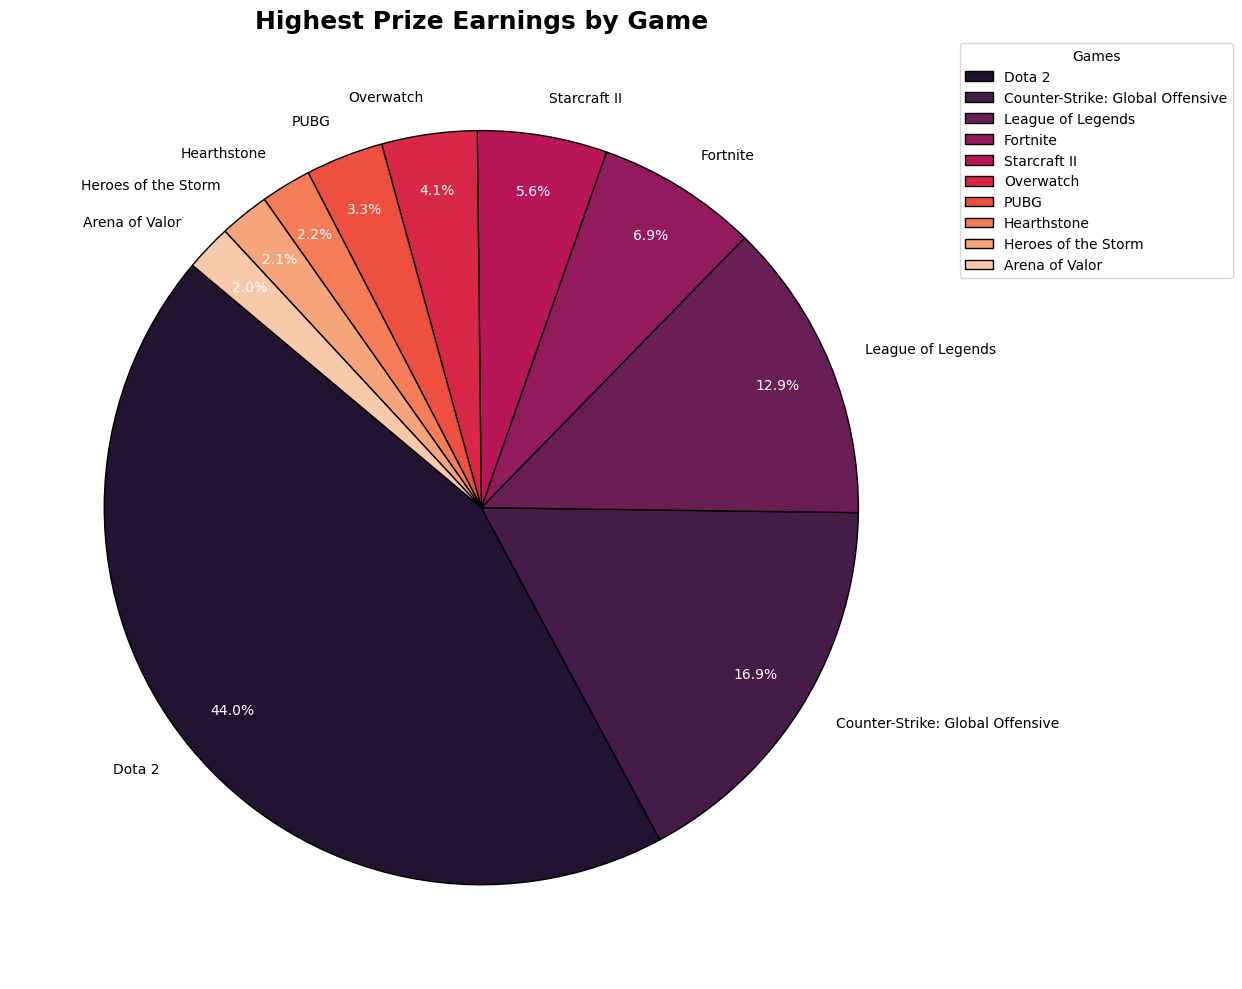

In [4]:
# earnings by game
Games_earnings = tdf.groupby(['Game'])['TotalUSDPrize'].sum().sort_values(ascending=False).reset_index()

colors = sns.color_palette("rocket", len(Games_earnings))

# plot pie chart
plt.figure(figsize=(15, 10))
fig = plt.figure(figsize=(15, 10))  
fig.patch.set_facecolor('white')

wedges, texts, autotexts = plt.pie(
    Games_earnings['TotalUSDPrize'], 
    labels=Games_earnings['Game'],
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    pctdistance=0.85,  
    wedgeprops={'edgecolor': 'black'}
)

# format text colors
for text in texts:
    text.set_color("black")
for autotext in autotexts:
    autotext.set_color("white")

# add legend and title
plt.legend(Games_earnings['Game'], title="Games", loc="upper left", bbox_to_anchor=(1,1))
plt.title('Highest Prize Earnings by Game', fontsize=18, fontweight='bold', color='black')
plt.tight_layout()
plt.show()

## Graph 2: Highest Prize Earnings by Genre (Pie Chart)

<Figure size 1500x1000 with 0 Axes>

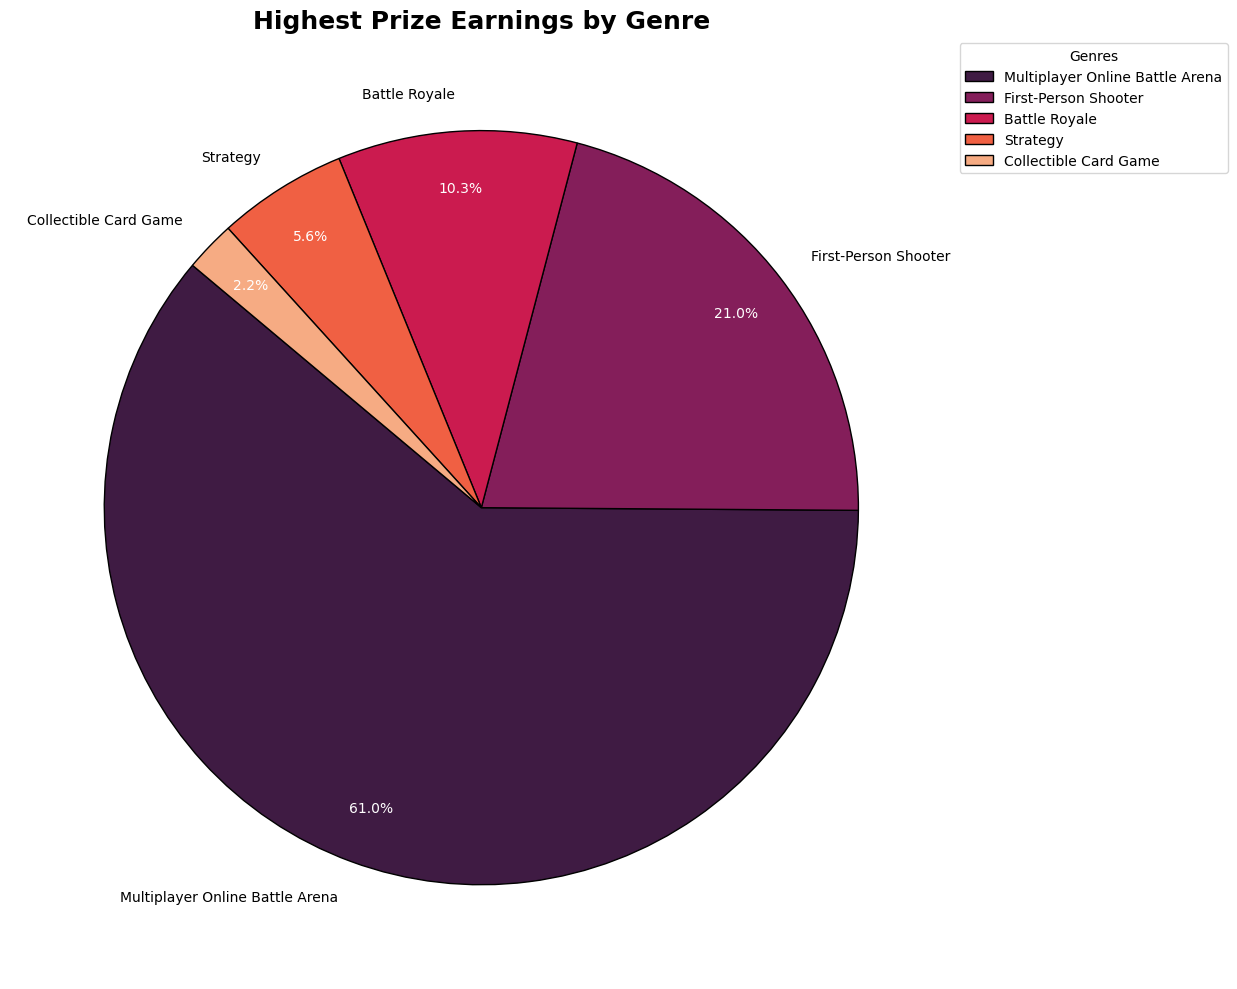

In [5]:
# earnings by genre
Genre_earnings = tdf.groupby(['Genre'])['TotalUSDPrize'].sum().sort_values(ascending=False).reset_index()

colors = sns.color_palette("rocket", len(Genre_earnings))

# plot pie chart
plt.figure(figsize=(15, 10))
fig = plt.figure(figsize=(15, 10))  
fig.patch.set_facecolor('white')

wedges, texts, autotexts = plt.pie(
    Genre_earnings['TotalUSDPrize'], 
    labels=Genre_earnings['Genre'],
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    pctdistance=0.85,  
    wedgeprops={'edgecolor': 'black'}
)

# format text colors
for text in texts:
    text.set_color("black")
for autotext in autotexts:
    autotext.set_color("white")

# add legend and title
plt.legend(Genre_earnings['Genre'], title="Genres", loc="upper left", bbox_to_anchor=(1,1))
plt.title('Highest Prize Earnings by Genre', fontsize=18, fontweight='bold', color='black')
plt.tight_layout()
plt.show()

## Graph 3: Top Countries Prize Distribution by Game (Sunburst Chart)

In [6]:
# Top 5 earning countries
total_prize_by_country = pdf.groupby('CountryCode')['TotalUSDPrize'].sum().sort_values(ascending=False).head(5)
print(total_prize_by_country)

CountryCode
cn    72391878.56
kr    58441733.71
us    43099381.78
dk    26840800.02
se    20770423.01
Name: TotalUSDPrize, dtype: float64


In [7]:
# filter dataset for top 5 countries
top_countries = pdf[pdf['CountryCode'].isin(['cn', 'kr', 'us', 'dk', 'se'])]

# group by country and game
countries_prize = top_countries.groupby(['CountryCode','Game'])['TotalUSDPrize'].sum() \
    .reset_index().sort_values('TotalUSDPrize', ascending=False)

# plot sunburst
fig = px.sunburst(
    countries_prize, 
    path=['CountryCode', 'Game'], 
    values='TotalUSDPrize',
    color='CountryCode',
    color_discrete_sequence=px.colors.sequential.Sunsetdark_r,
    width=800, 
    height=800
)

fig.update_layout(title='Top Countries Prize Distribution by Game')
fig.show()

## Graph 4: Earnings by Genre (Boxplot)

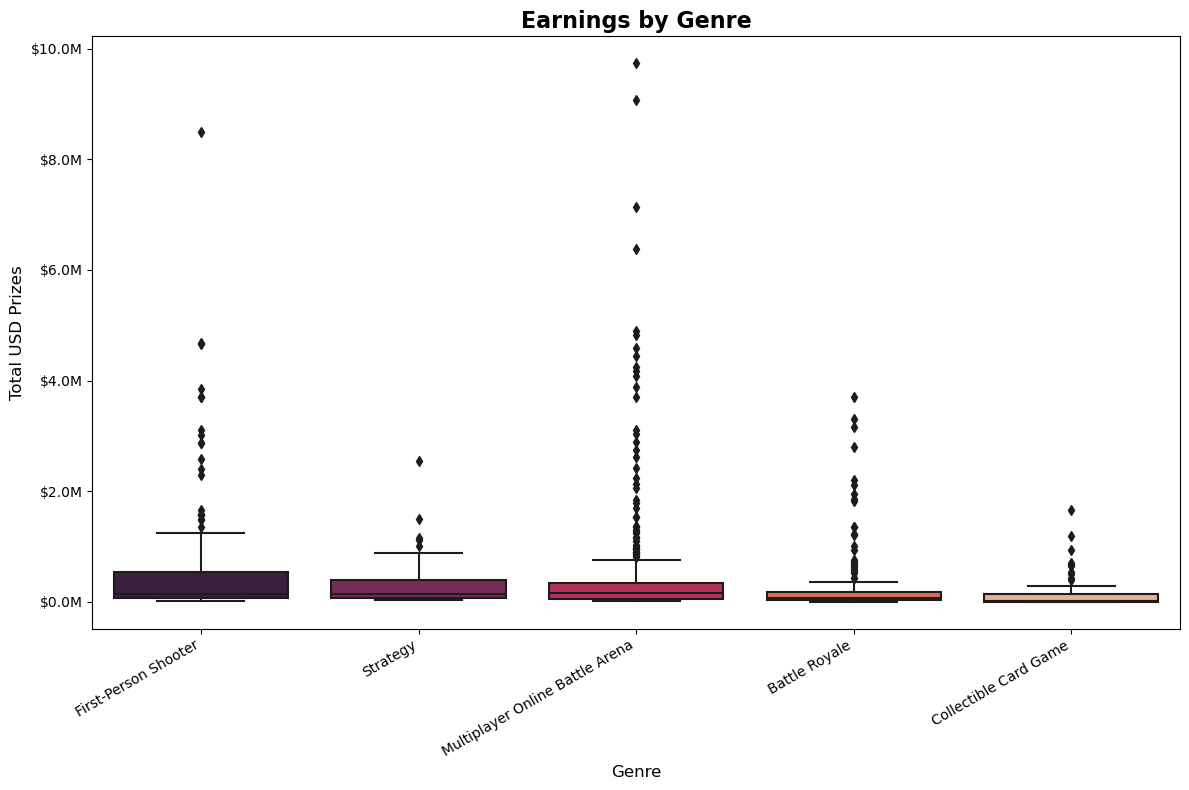

In [8]:
# replace extreme values
tdf['Genrex'] = tdf.Genre.where(tdf.TotalUSDPrize < 10000000)

plt.figure(figsize=(12, 8))

# create boxplot
box_plot = sns.boxplot(
    x='Genrex',
    y='TotalUSDPrize',
    data=tdf,
    palette="rocket"
)

# title and labels
box_plot.set_title('Earnings by Genre', fontsize=16, fontweight='bold')
box_plot.set_xlabel('Genre', fontsize=12)
box_plot.set_ylabel('Total USD Prizes', fontsize=12)

# rotate and format labels for better readability
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=30, ha='right')
box_plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x*1e-6:.1f}M'))

plt.tight_layout()
plt.show()

## Graph 5: Tournaments vs Prize Money (Scatterplot)

In [9]:
# group by genre and aggregate total prize money and tournaments
genre_summary = tdf.groupby('Genre').agg({
    'TotalUSDPrize': 'sum',
    'TotalTournaments': 'sum'
}).reset_index()

# size column for bubble size, scaled to millions
genre_summary['BubbleSize'] = genre_summary['TotalUSDPrize'] / 1e6

# create scatterplot
fig = px.scatter(
    genre_summary,
    x='TotalTournaments',
    y='TotalUSDPrize',
    size='BubbleSize',
    color='Genre',
    color_discrete_sequence=px.colors.sequential.Sunsetdark_r,
    hover_name='Genre',
    size_max=60,
    title='Tournaments vs Prize Money',
    labels={
        'TotalUSDPrize': 'Total Prize Money (USD)',
        'TotalTournaments': 'Number of Tournaments'
    }
)

# update layout for better readability
fig.update_layout(
    template='plotly_white',
    title_font_size=20,
    width=1000,
    height=600
)

fig.show()

## Graph 6: Total Prize Earnings by Game (Bar Plot)

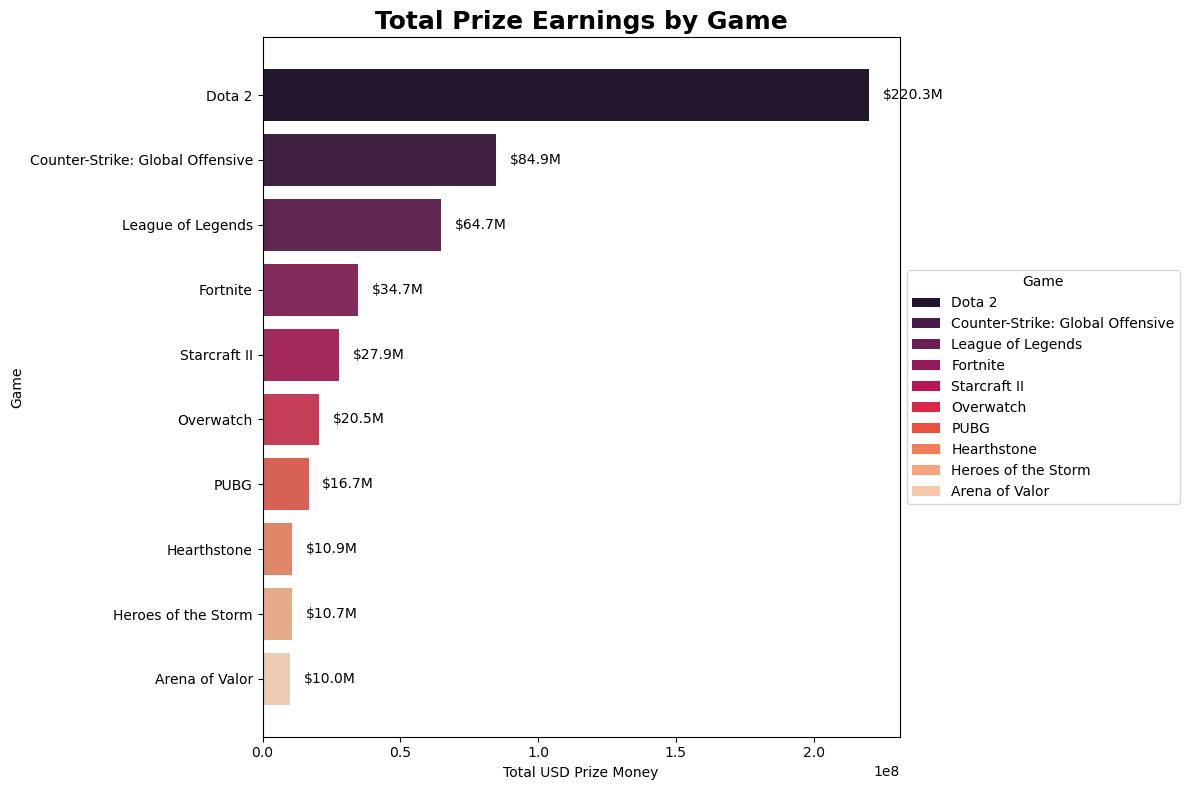

In [10]:
colors = sns.color_palette("rocket", len(Games_earnings))

# plot bar chart for total prize earnings by game
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=Games_earnings, x='TotalUSDPrize', y='Game', palette=colors)

for i, val in enumerate(Games_earnings['TotalUSDPrize']):
    plt.text(val + 5000000, i, f"${val/1e6:.1f}M", va='center', fontsize=10)

# title and labels
plt.title('Total Prize Earnings by Game', fontsize=18, fontweight='bold')
plt.xlabel('Total USD Prize Money')
plt.ylabel('Game')

# create legend for games
for i, genre in enumerate(Games_earnings['Game']):
    bar_plot.bar(i, 0, color=colors[i], label=genre)
plt.legend(title='Game', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()